<a href="https://colab.research.google.com/github/YogoBog/PythonMLProjects/blob/main/predicting_liked_songs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl">

#<font color='#6400E4'><b>שלב 1 - טעינת הנתונים וחקירת הנתונים הגולמיים (Raw data)</b></font></div>


<div dir="rtl">


טענו את הקובץ [liked_songs.csv](https://drive.google.com/file/d/1nGHsep-RVgSdd7wwQghMV2_31zq14RS_/view?usp=sharing)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
file1 = open('/content/drive/MyDrive/liked_songs.csv')
df = pd.read_csv(file1)


In [ ]:
df.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0.0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0.0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1.0,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0.0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1.0,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [ ]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
count,193.000000,194.000000,195.000000,193.000000,194.000000,193.000000,194.000000,193.000000,193.000000,193.000000,195.000000,195.000000,195.000000,195.000000
mean,0.636062,0.637202,5.497436,-9.508212,0.541237,0.149685,0.318336,0.194328,0.149144,0.490903,121.086174,213408.933333,3.912821,0.512821
std,0.217315,0.260200,3.415209,6.553701,0.499586,0.120758,0.321437,0.347466,0.106244,0.267723,28.084829,72152.392864,0.451332,0.501122
min,0.130000,0.002400,0.000000,-42.261000,0.000000,0.027800,0.000003,0.000000,0.033100,0.035300,60.171000,77203.000000,1.000000,0.000000
25%,0.462000,0.533250,2.000000,-9.965000,0.000000,0.057100,0.042200,0.000000,0.084100,0.267000,100.242000,178300.500000,4.000000,0.000000
50%,0.705000,0.659000,6.000000,-7.834000,1.000000,0.096200,0.210500,0.000008,0.105000,0.521000,124.896000,204000.000000,4.000000,1.000000
75%,0.798000,0.835750,8.000000,-5.820000,1.000000,0.231000,0.506500,0.104000,0.179000,0.712000,142.460500,242373.500000,4.000000,1.000000
max,0.946000,0.996000,11.000000,-2.336000,1.000000,0.540000,0.995000,0.969000,0.633000,0.980000,180.036000,655213.000000,5.000000,1.000000


In [ ]:
print(df.shape)
print(df.dtypes)

(195, 14)
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
liked                 int64
dtype: object


המאפיינים הקטגוריאליים הם:

liked

time_signature

mode

key

<div dir="rtl">

#<font color='#6400E4'><b>שלב 2 - עיבוד והנדסת הנתונים (Feature Engineering)</b></font></div>


<div dir="rtl">

#זיהוי ערכים חריגים

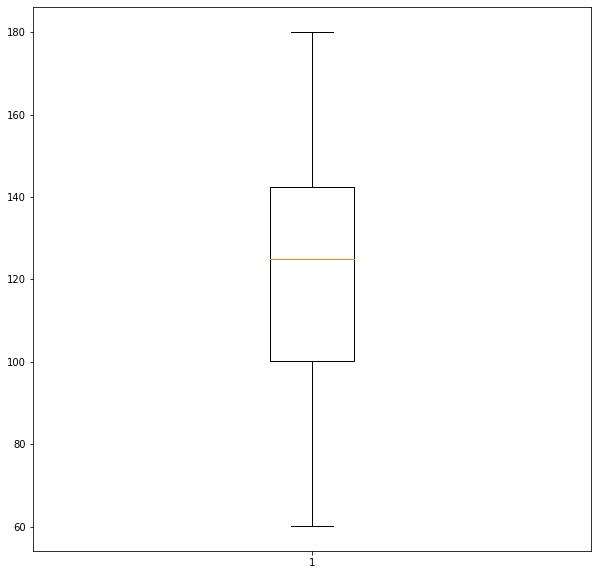

In [ ]:
import matplotlib.pyplot as plt
tempo = df.loc[:,'tempo']
fig = plt.figure(figsize =(10, 10))
plt.boxplot(tempo)
plt.show()


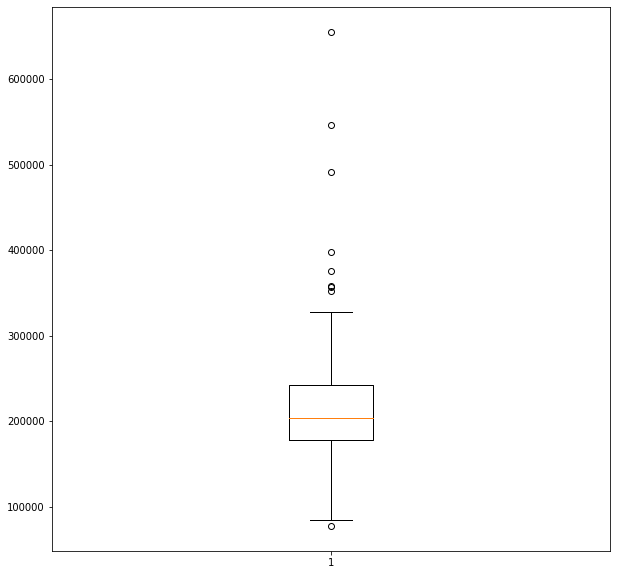

In [ ]:
duration = df.loc[:,'duration_ms']
fig2 = plt.figure(figsize =(10, 10))
plt.boxplot(duration)
plt.show()

<div dir="rtl">

#טיפול בערכים חסרים

In [ ]:
df[df.isnull().any(axis=1)]


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
9,0.853,0.66800,3,-6.995,1.0,0.4470,0.263000,0.000000,0.1040,NaN,157.995,165363,4,1
21,0.438,0.08250,9,-21.686,0.0,0.0695,0.983000,0.074900,NaN,0.3700,106.275,270000,5,0
36,0.784,0.70000,7,-7.649,0.0,0.1080,0.491000,0.000000,0.1080,NaN,82.028,190067,4,0
47,0.924,0.74800,2,-3.645,1.0,0.1880,0.174000,NaN,0.2070,0.3810,121.063,209667,4,1
58,0.364,0.00799,8,-33.090,1.0,NaN,0.978000,0.894000,0.1090,0.0674,101.226,216093,4,0
67,0.680,NaN,5,-10.241,0.0,0.0353,0.191000,0.000656,0.3490,0.9220,108.674,185107,4,0
70,0.774,0.85300,1,NaN,1.0,0.2460,0.027500,0.000000,0.0876,0.6190,123.041,106000,4,1
87,0.338,0.98800,8,-7.290,NaN,0.0865,0.000083,0.833000,0.0377,0.4490,99.046,221960,4,0
88,NaN,0.67200,9,-12.068,1.0,0.0619,0.043500,0.000000,0.0610,0.9330,109.394,300000,4,0
103,0.251,0.98100,10,-7.282,0.0,NaN,0.000063,0.729000,0.2190,0.2750,99.338,375307,4,0


In [ ]:
df = df.dropna()
df[df.isnull().any(axis=1)]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked


<div dir="rtl">

#נורמליזציה של נתונים

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import numpy as np
def normalization(column):
  data = np.array(column).reshape(-1,1)
  scaler = preprocessing.StandardScaler().fit(data)
  data_scaled = scaler.transform(data)
  return data_scaled

danceability_nor = normalization(df.iloc[:,0])
energy_nor = normalization(df.iloc[:,1])
loudness_nor = normalization(df.iloc[:,3])
speechiness_nor = normalization(df.iloc[:,5])
acousticness_nor = normalization(df.iloc[:,6])
instrumentalness_nor = normalization(df.iloc[:,7])
liveness_nor = normalization(df.iloc[:,8])
valence_nor = normalization(df.iloc[:,9])
tempo_nor = normalization(df.iloc[:,10])
duration_nor = normalization(df.iloc[:,11])

<div dir="rtl">

#<font color='#6400E4'><b>שלב 3 - בחירת משתנים ואנליזת ההתפלגות</b></font></div>


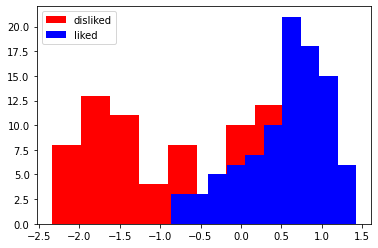

None


In [ ]:
def histogram(column):
  df_liked = df.loc[df['liked'] == 1]
  df_one = df_liked.loc[:,column]
  df_disliked = df.loc[df['liked'] == 0]
  df_zero = df_disliked.loc[:,column]
  plt.hist(df_zero, color = 'red', label='disliked')
  plt.hist(df_one, color = 'blue', label='liked')
  plt.legend()
  plt.show()

df['danceability'] = danceability_nor
print(histogram('danceability'))

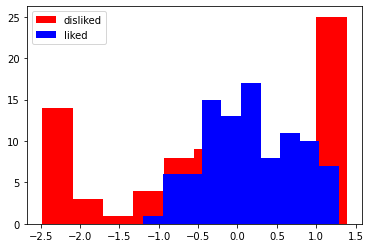

None


In [ ]:
df['energy'] = energy_nor
print(histogram('energy'))

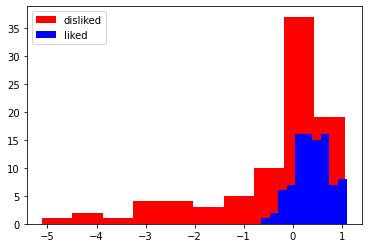

None


In [ ]:
df['loudness'] = loudness_nor
print(histogram('loudness'))

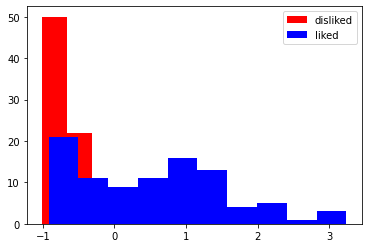

None


In [ ]:
df['speechiness'] = speechiness_nor
print(histogram('speechiness'))

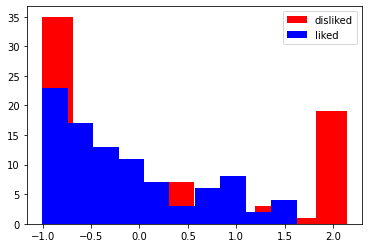

None


In [ ]:
df['acousticness'] = acousticness_nor
print(histogram('acousticness'))

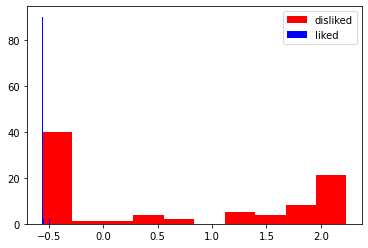

None


In [ ]:
df['instrumentalness'] = instrumentalness_nor
print(histogram('instrumentalness'))

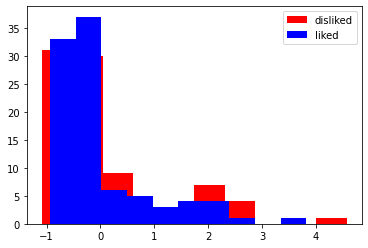

None


In [ ]:
df['liveness'] = liveness_nor
print(histogram('liveness'))

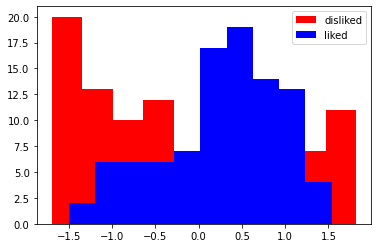

None


In [ ]:
df['valence'] = valence_nor
print(histogram('valence'))

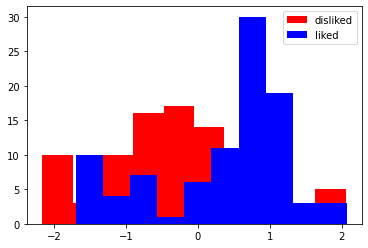

None


In [ ]:
df['tempo'] = tempo_nor
print(histogram('tempo'))

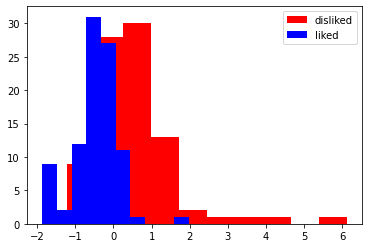

None


In [ ]:
df['duration'] = duration_nor
print(histogram('duration'))

<div dir="rtl">

#<font color='#6400E4'><b>שלב 4 - מודל של שני מאפיינים</b></font></div>


In [ ]:
data = df.iloc[:,[7,9,13]]
data

,instrumentalness,valence,liked
0,-0.558211,0.510098,0
1,-0.560328,0.104356,1
2,2.026485,-1.685378,0
3,-0.560324,0.338867,1
4,-0.560328,0.580824,1
...,...,...,...
188,-0.560328,0.863727,1
189,1.919783,-1.436721,0
190,1.270917,-1.295269,0
191,-0.559887,1.455589,0


In [ ]:
import sklearn.neighbors
import sklearn.model_selection
import sklearn.datasets
import numpy as np
from sklearn import utils
from sklearn.metrics import accuracy_score
lab_enc = preprocessing.LabelEncoder()
X = data.iloc[:,[0,1]].to_numpy()
Y = data.iloc[:,[2]].to_numpy()
x_train, x_test, y_train, y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.3,random_state=1)
k = 5
model = sklearn.neighbors.KNeighborsClassifier(k,algorithm='brute')
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='brute')

In [ ]:
#@title
import numpy as np
from matplotlib.colors import ListedColormap
# this function will plot your model decision boundary. don't worry about the implementation :)

def plot_decision_boundary(model):
    cmap_light = ListedColormap(["cyan","orange"])

    x_min, x_max = X.min() - 1, X.max() + 1
    y_min, y_max = Y.min() - 3,Y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)

# this function will plot your data. don't worry about the implementation :)

def plot_data(X, y):
    labels = [0, 1]
    cmap_bold = ["c","darkorange"]

    for label in labels:
        label_indices = [i for i in range(len(y)) if y[i] == label]
        label_X = X[label_indices,:]
        plt.scatter(x=label_X[:, 0], y=label_X[:, 1], c=cmap_bold[label], label=label)
    plt.legend()

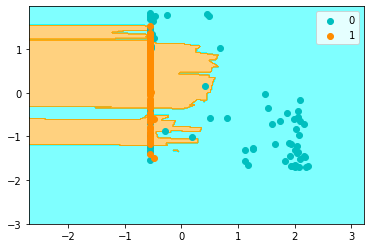

In [ ]:
plot_decision_boundary(model)
plot_data(X,Y)

<div dir="rtl">

#<font color='#6400E4'><b>שלב 5 - מודל רב מאפיינים - משתנים רציפים בלבד</b></font></div>


In [ ]:
X = df.loc[:,["danceability","energy","loudness","speechiness","instrumentalness","liveness","valence","tempo","acousticness"]].to_numpy()
Y = df.loc[:,["liked"]].to_numpy()
x_train, x_test, y_train, y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.3,random_state=1)
model = sklearn.neighbors.KNeighborsClassifier(k,algorithm='brute')
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='brute')

In [ ]:
from sklearn.metrics import confusion_matrix
x_pred = model.predict(x_test)
confusion_matrix(y_test, x_pred)

array([[27,  1],
       [ 1, 25]])

In [ ]:
accuracy_score(y_test, x_pred)

0.9629629629629629

<div dir="rtl">

#<font color='#6400E4'><b>שלב 6 - מודל רב מאפיינים - משתנים רציפים וקטגוריאלים</b></font></div>

In [ ]:
data_two = df
dummy_key = pd.get_dummies(df['key'])
dummy_d = pd.get_dummies(df['duration_ms'])
dummy_t = pd.get_dummies(df['time_signature'])
data_two['key'] = dummy_key.to_numpy()
data_two['duration_ms'] = dummy_d.to_numpy()
data_two['time_signature'] = dummy_t.to_numpy()

In [ ]:
X_three = data_two.loc[:,["danceability","energy","loudness"
                          ,"speechiness","instrumentalness",
                            "liveness","valence","tempo","acousticness",
                              "key","duration_ms","time_signature"]].to_numpy()
Y_three = data_two.iloc[:,[13]].to_numpy()
x_train_three, x_test_three, y_train_three, y_test_three=sklearn.model_selection.train_test_split(X_three,Y_three,test_size=0.3,random_state=1)
k_three = 3
model_three = sklearn.neighbors.KNeighborsClassifier(k_three,algorithm='brute')
model_three.fit(x_train_three,y_train_three)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='brute', n_neighbors=3)

In [ ]:
x_pred_three = model_three.predict(x_test_three)
accuracy_score(y_test_three, x_pred_three)

0.9074074074074074

In [ ]:
for i in range(1,41):
  k_three = i
  model_three = sklearn.neighbors.KNeighborsClassifier(k_three,algorithm='brute')
  model_three.fit(x_train_three,y_train_three)
  x_pred_three = model_three.predict(x_test_three)
  print(accuracy_score(y_test_three, x_pred_three))

0.8703703703703703
0.8888888888888888
0.9074074074074074
0.9444444444444444
0.9629629629629629
0.9629629629629629
0.9444444444444444
0.9444444444444444
0.9629629629629629
0.9444444444444444
0.9259259259259259
0.9444444444444444
0.8518518518518519
0.8888888888888888
0.8333333333333334
0.8148148148148148
0.8333333333333334
0.8333333333333334
0.7962962962962963
0.8148148148148148
0.7777777777777778
0.7962962962962963
0.7407407407407407
0.7592592592592593
0.7407407407407407
0.7222222222222222
0.7037037037037037
0.7222222222222222
0.7222222222222222
0.7222222222222222
0.7222222222222222
0.7592592592592593
0.7222222222222222
0.7222222222222222
0.7222222222222222
0.7407407407407407
0.7037037037037037
0.7222222222222222
0.7037037037037037
0.7037037037037037


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

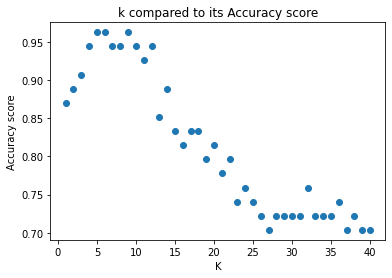

In [ ]:
x = []
y = []

for i in range(1,41):
  k_three = i
  x += [k_three]
  model_three = sklearn.neighbors.KNeighborsClassifier(k_three,algorithm='brute')
  model_three.fit(x_train_three,y_train_three)
  x_pred_three = model_three.predict(x_test_three)
  y += [accuracy_score(y_test_three, x_pred_three)]

plt.scatter(x, y)
plt.title("k compared to its Accuracy score")
plt.xlabel("K")
plt.ylabel("Accuracy score")
plt.show()